In [7]:
import pandas as pd
import numpy as np

#graphs
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()

#show graphs in notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

from IPython.display import display


In [3]:
#merge2018-tratado.csv
merge2018 = pd.read_csv("merge2018-tratado.csv")

/var/folders/fh/g5fgxqq513n014czxdxy7sfc0000gn/T/ipykernel_23932/1510582360.py:2: DtypeWarning: Columns (24,39,76,77,88,129,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  merge2018 = pd.read_csv("merge2018-tratado.csv")


In [4]:
merge2018.head()

,Unnamed: 0,Ano Letivo de Previsão de Conclusão,Ano de Conclusão,Ano de Ingresso,Campus,Cota MEC,Cota Sistec,Código Curso,Data de Conclusão de Curso,Data do Último Procedimento,...,LOCAL_DESLOC_DIST,LOCAL_UF,LOCAL_UF_CIDADE,LOCAL_PAIS,LOCAL_DESLOC_MOTIVO,PAE_AVALIACAO,PAE_PRELECAO,ASREMT,ano_ultimo_procedimento,curso
0,0,2024,NaN,2023,AP,NaN,NaN,8079,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Técnico em Agropecuária
1,1,2021,2021.0,2018,AP,NaN,NaN,8401,11/01/2022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Técnico em Informática
2,2,2020,NaN,2018,AP,NaN,NaN,8407,NaN,2018-03-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Técnico em Manutenção e Suporte em Informática
3,4,2022,NaN,2020,AP,NaN,NaN,8428,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Técnico em Química
4,5,2022,2022.0,2019,AP,NaN,NaN,8427,17/02/2023,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Técnico em Biocombustíveis


In [5]:
# Create the 'status' column based on the values in 'Situação no Curso_'
situations_of_interest = ["Evasão", "Trancamento", "Trancamento Voluntário"]
merge2018["status"] = merge2018["Situação no Curso"].apply(lambda x: "evasão" if x in situations_of_interest else "outro")

merge2018[["Situação no Curso", "status"]].head()

,Situação no Curso,status
0,Matriculado,outro
1,Concluído,outro
2,Evasão,evasão
3,Evasão,evasão
4,Concluído,outro


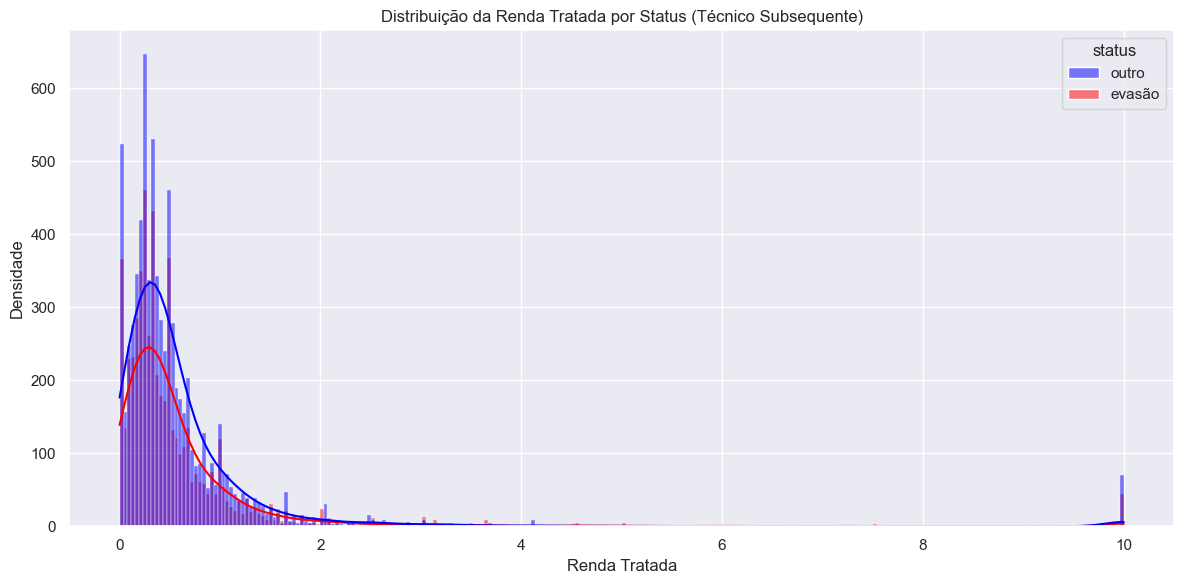

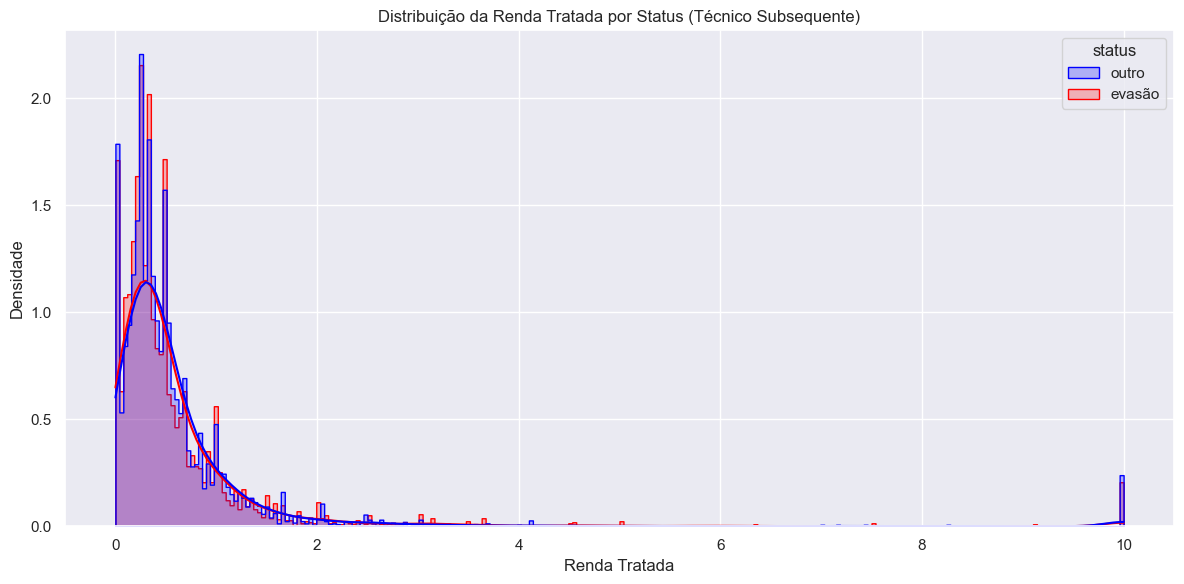

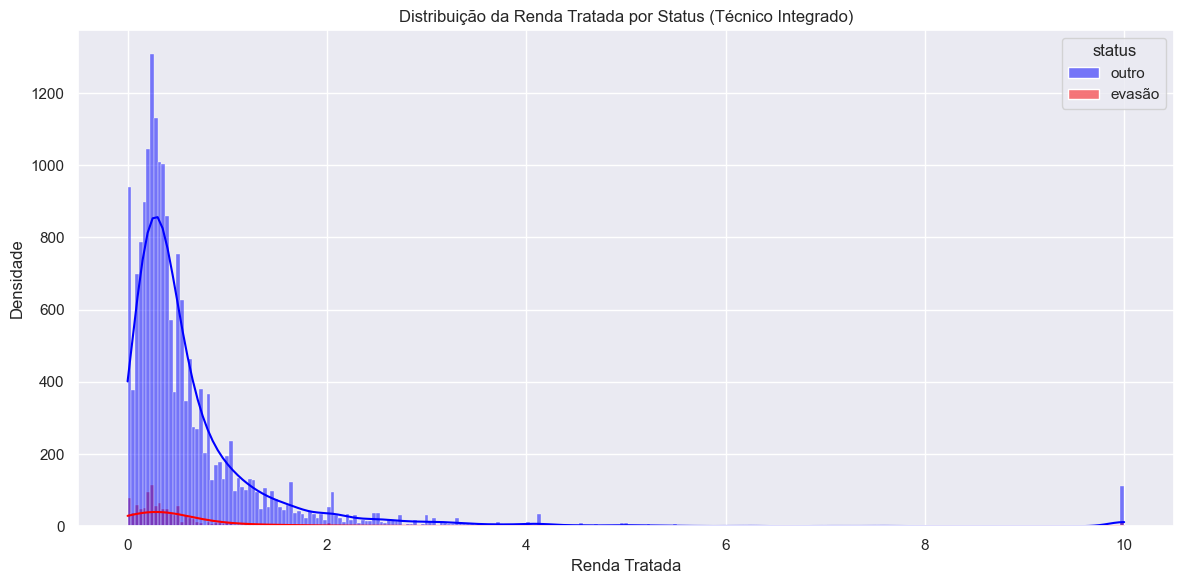

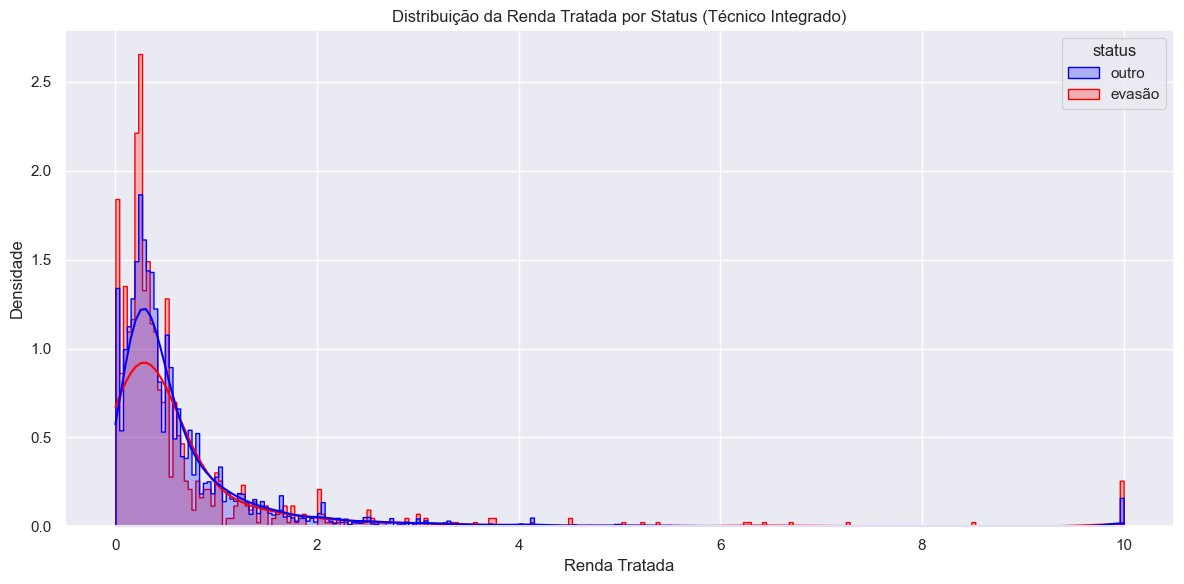

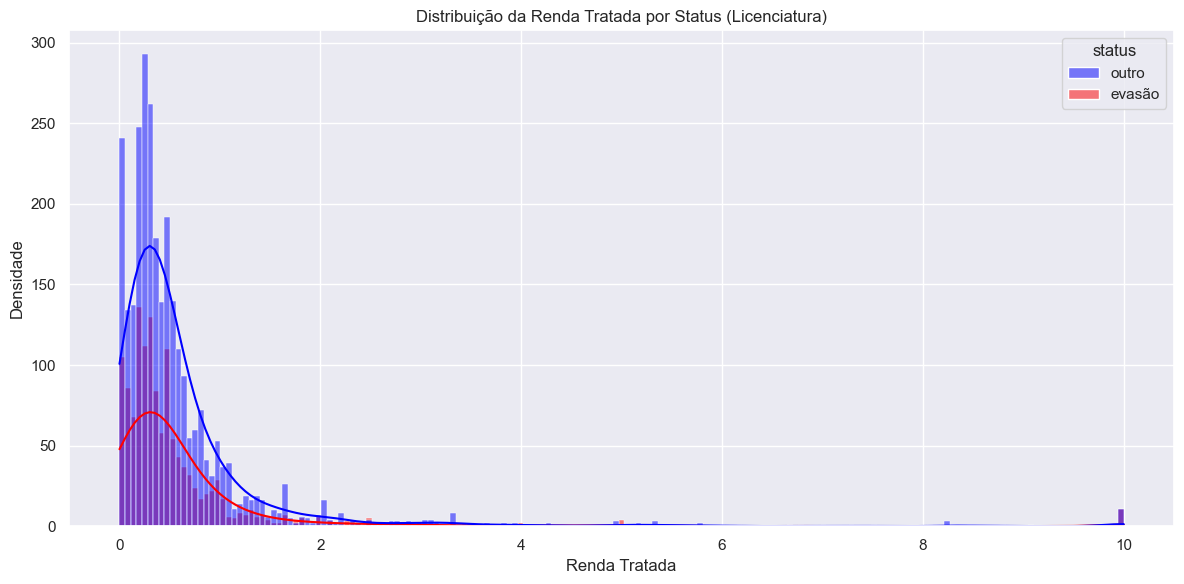

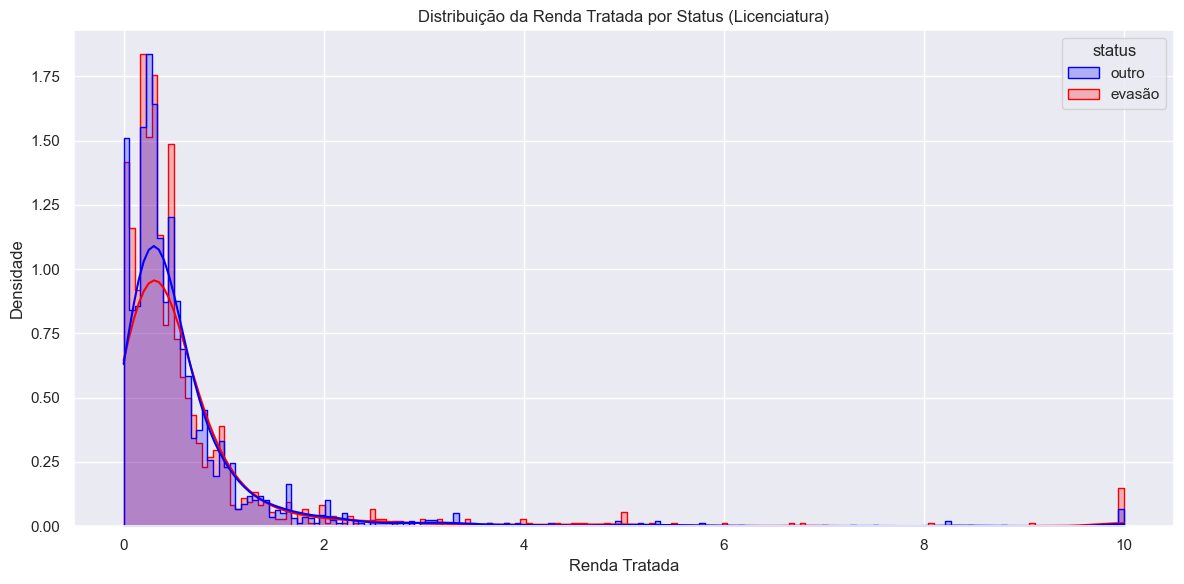

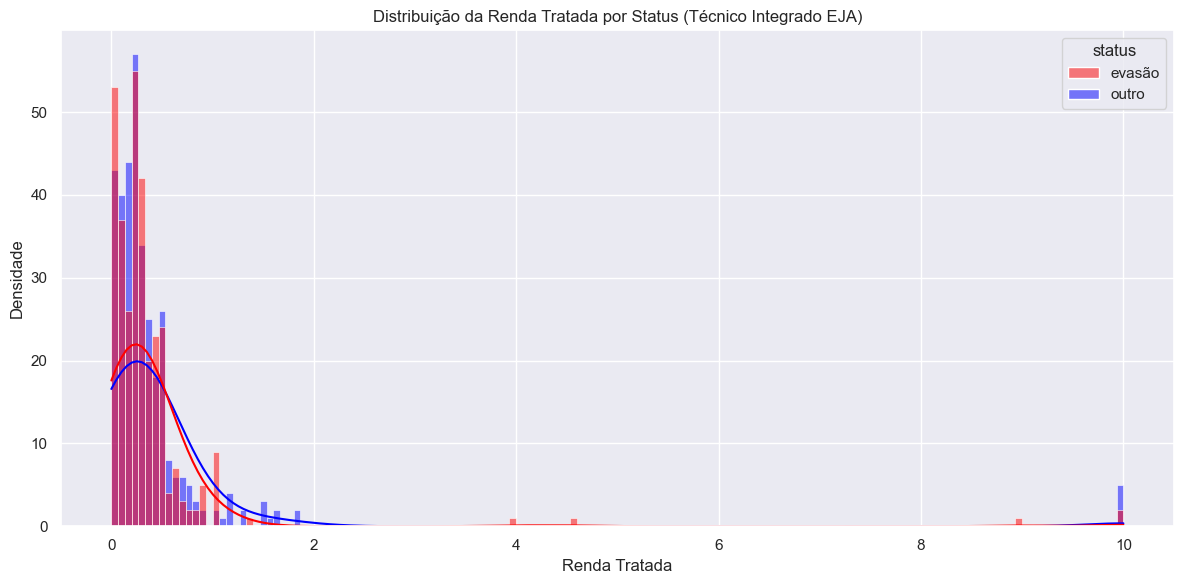

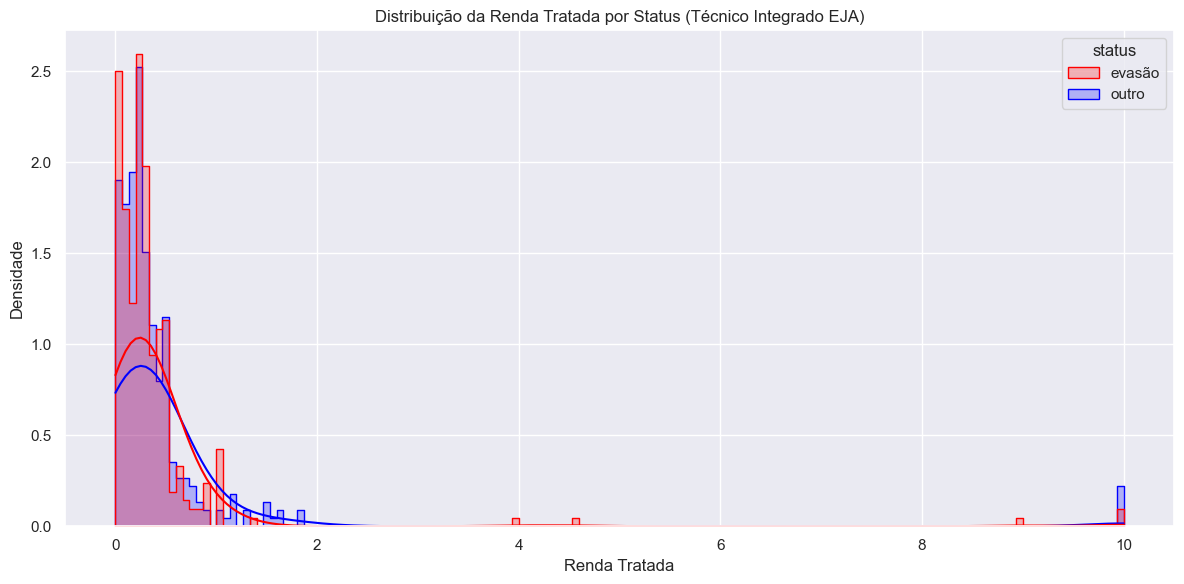

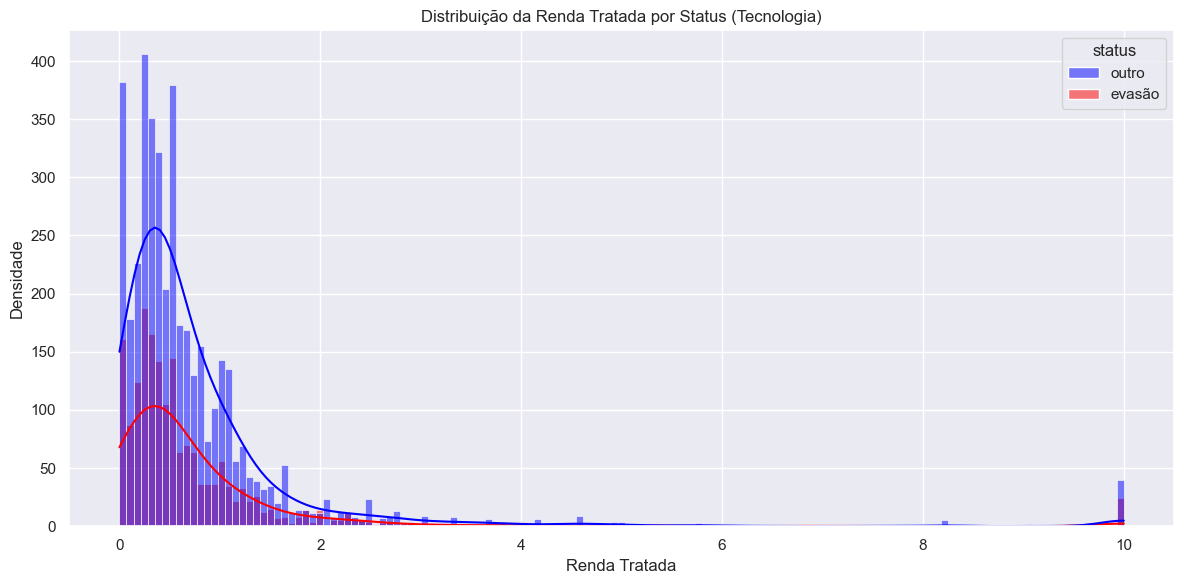

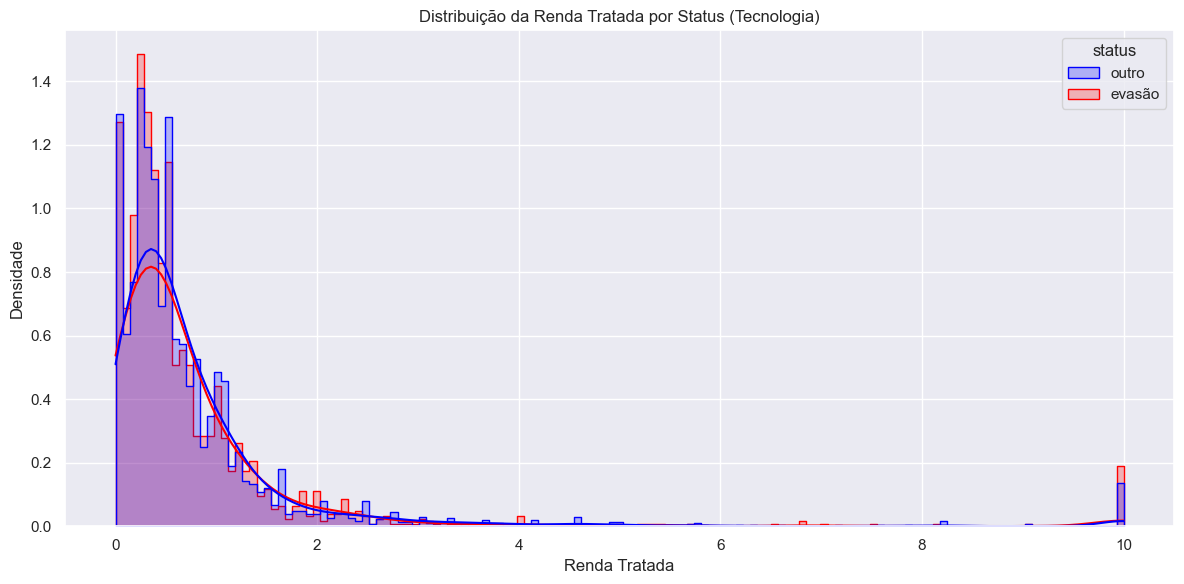

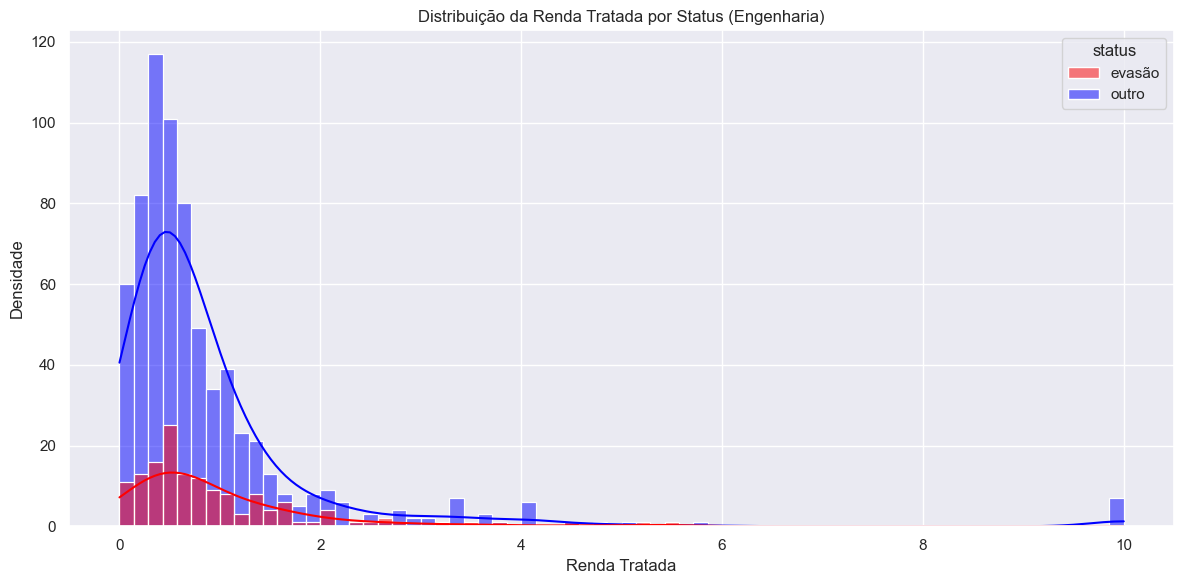

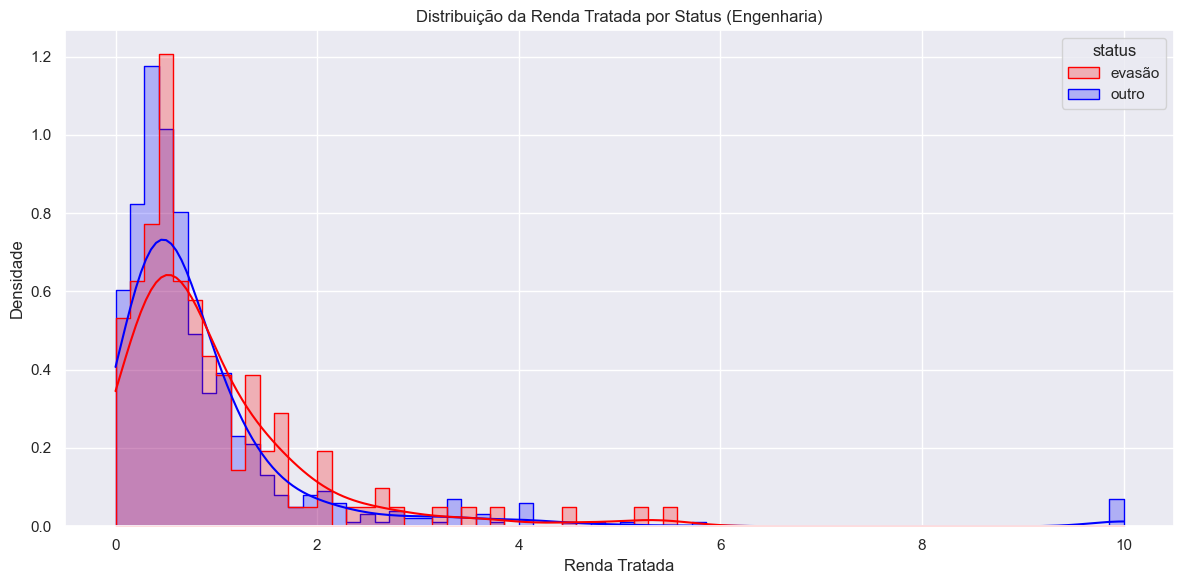

In [13]:
def plot_kde_for_modalidade(data, modalidade_value, tipo):
    """Generate a KDE plot for a given modalidade value."""

    filtered_data = data[data['Modalidade'] == modalidade_value]

    # Plotting the KDE
    palette = {"evasão": "red", "outro": "blue"}
    plt.figure(figsize=(12, 6))
    if tipo == 1:
        sns.kdeplot(data=filtered_data, x="Renda Per Capita", hue="status", fill=True, palette=palette)
    elif tipo == 2:
        sns.kdeplot(data=filtered_data, x="Renda Per Capita", hue="status", multiple="fill", palette=palette, alpha=.5) #palette='coolwarm')
    elif tipo == 3:
        sns.kdeplot(
            data=filtered_data, x="Renda Per Capita", hue="status",
            cumulative=True, common_norm=False, common_grid=True,
            #palette='coolwarm'
            palette=palette, alpha=.5
        )
    elif tipo == 4:
        sns.histplot(data=filtered_data, x="Renda Per Capita", hue="status",
                     common_norm=True, kde=True, palette=palette)
    elif tipo == 5:
        sns.histplot(data=filtered_data, x="Renda Per Capita", hue="status",
                     stat="density", common_norm=True, kde=True, palette=palette)
    elif tipo == 6:
        sns.histplot(data=filtered_data, x="Renda Per Capita", hue="status",
                     element="step", stat="density", kde=True, common_norm=False,
                     palette=palette)

    plt.title(f"Distribuição da Renda Tratada por Status ({modalidade_value})")
    plt.xlabel("Renda Tratada")
    plt.ylabel("Densidade")
    plt.tight_layout()
    plt.show()

# Generate the KDE plot for each unique value in 'Modalidade'
for modalidade in merge2018['Modalidade'].unique():
    #plot_kde_for_modalidade(data_selected, modalidade, 1)
    #plot_kde_for_modalidade(data_selected, modalidade, 2)
    #plot_kde_for_modalidade(data_selected, modalidade, 3)
    plot_kde_for_modalidade(merge2018, modalidade, 4)
    #plot_kde_for_modalidade(data_selected, modalidade, 5)
    plot_kde_for_modalidade(merge2018, modalidade, 6)

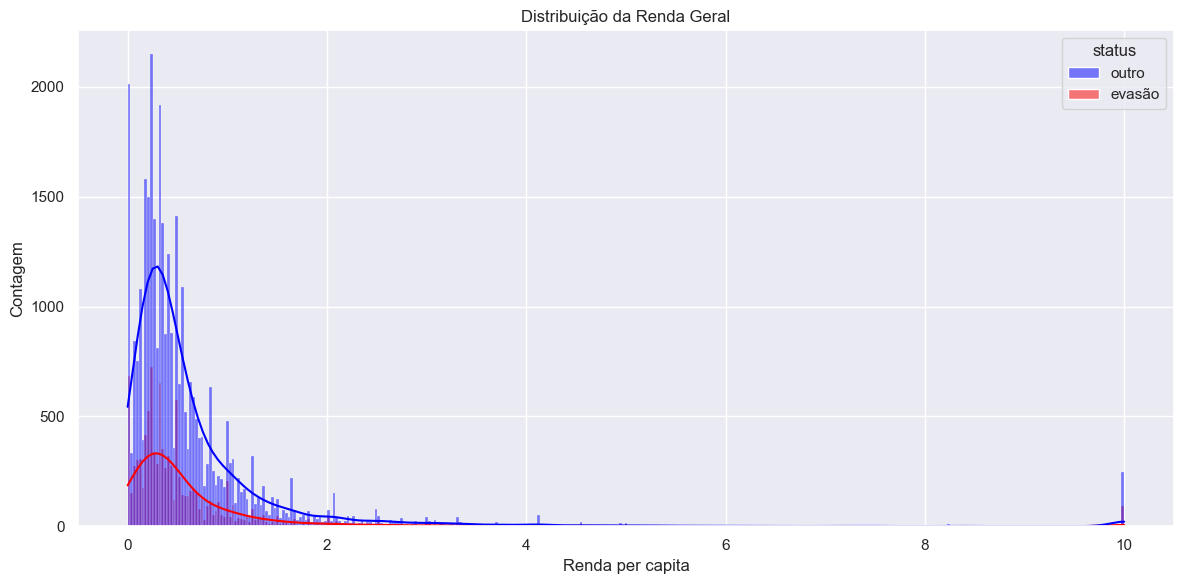

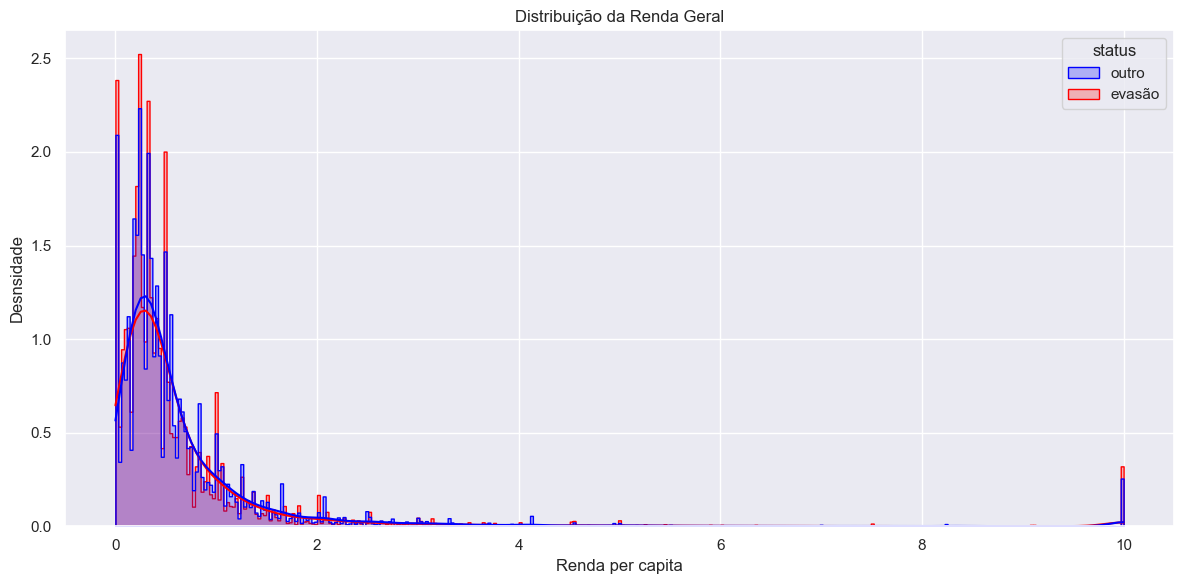

In [15]:
# Plotting the KDE
palette = {"evasão": "red", "outro": "blue"}

plt.figure(figsize=(12, 6))

sns.histplot(data=merge2018, x="Renda Per Capita", hue="status",
                     common_norm=True, kde=True, palette=palette)

plt.title(f"Distribuição da Renda Geral")
plt.xlabel("Renda per capita")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

sns.histplot(data=merge2018, x="Renda Per Capita", hue="status",
                element="step", stat="density", kde=True, common_norm=False,
                palette=palette)

plt.title(f"Distribuição da Renda Geral")
plt.xlabel("Renda per capita")
plt.ylabel("Desnsidade")
plt.tight_layout()
plt.show()
